This notebook analyses all transcipts downloaded via the scrape_episode_urls.py tool.

In [79]:
#all necessary imports
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
files = glob.glob('raw_data/*.csv')

In [81]:
df_list = []
for f in files:
    df = pd.read_csv(f, sep=",", header=None, names=["Character", "Utterance"])
    df_list.append(df)
    
transcripts = pd.concat(df_list, axis=0, ignore_index=True)

Analyse the number of **lines** per character

In [84]:
number_of_utterances_per_person = transcripts.groupby("Character").count()

In [139]:
top_15_characters_lines = number_of_utterances_per_person.sort_values(by="Utterance", ascending=False).head(15).reset_index()

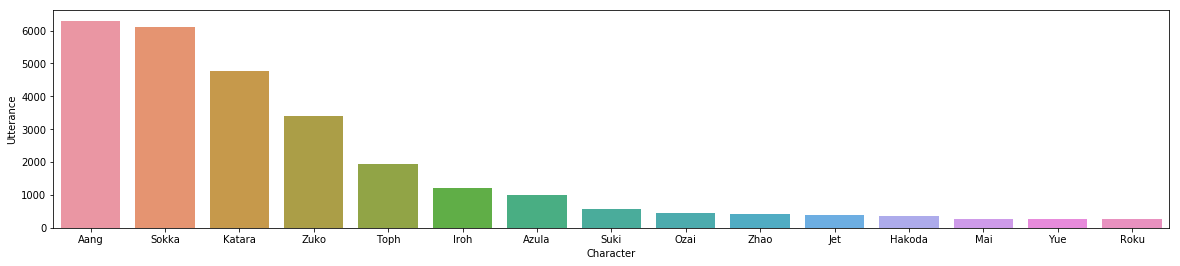

In [140]:
plt.figure(figsize=(20,4))
sns.barplot(x="Character", y="Utterance", data=top_15_characters_lines)

Analyse the number of **words** spoken per character

In [124]:
word_count = transcripts["Utterance"].apply(lambda x: len(x.split()))
transcripts_with_word_count = pd.concat([transcripts, word_count], axis=1)
transcripts_with_word_count.columns = ["Character", "Utterance", "Wordcount"]

In [122]:
transcripts_with_word_count.head()

,Character,Utterance,Wordcount
0,Aang,"Hey, look! A sword made out of a whale's tooth.",10
1,Sokka,Let me see that.,4
2,Sokka,This is a Water Tribe weapon. See if you can f...,13
3,Katara,Did someone lose something?,4
4,Aang,"No, we found something!",4


In [134]:
number_of_words_per_character = transcripts_with_word_count[["Character", "Wordcount"]].groupby("Character").sum()

In [141]:
top_15_characters_words = number_of_words_per_person.sort_values(by="Wordcount", ascending=False).head(15).reset_index()

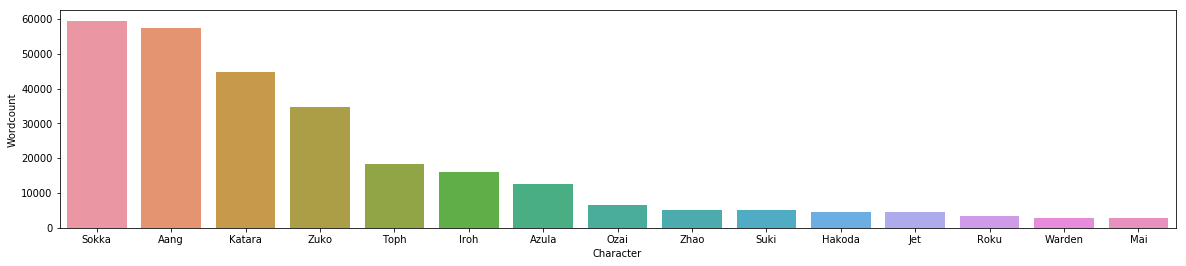

In [150]:
plt.figure(figsize=(20,4))
sns.barplot(x="Character", y="Wordcount", data=top_15_characters_words)